## plot spatial ACC pattern of DPLE

In [1]:
import matplotlib.colors as colors
from matplotlib import cm,gridspec,rc
import matplotlib.pyplot as plt
import os
import utils
import warnings
import numpy as np
import pandas as pd
import xarray as xr
import tools_corrstats
import cmcrameri.cm as cmc
warnings.filterwarnings('ignore')

In [2]:
USER = os.environ['USER']
var = 'Phi'
layer = '0-200m'
#layer = '200-600m'
if layer == '0-200m':
    ffgg = 'Figure3'
else:
    ffgg = 'Supp_Figure3'

In [3]:
def mask_nan(var):
    """
    mask nan values
    """
    maskn = np.isnan(var)
    var = np.ma.array(var,mask=maskn)
    return var

### read Persistence and DPLE ACC

In [4]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE_spatial_persistence_DPLE_ACC_NMAE_medium_Eo_{var}_{layer}_leadyear1-10.nc'
ds_fore = xr.open_dataset(filename)
corr_p = ds_fore['corr_p'].values
rcri_p = ds_fore['rcri_p'].values
corr_d = ds_fore['corr_d'].values
rcri_d = ds_fore['rcri_d'].values
corr13 = ds_fore['corr13'].values
rcri13 = ds_fore['rcri13'].values
nmae_p = ds_fore['nmae_p'].values
nmae_d = ds_fore['nmae_d'].values
lon = ds_fore['lon'].values
lat = ds_fore['lat'].values
#
corr_p = mask_nan(corr_p);rcri_p = mask_nan(rcri_p)
corr_d = mask_nan(corr_d);rcri_d = mask_nan(rcri_d)
corr13 = mask_nan(corr13);rcri13 = mask_nan(rcri13)
nmae_p = mask_nan(nmae_p);nmae_d = mask_nan(nmae_d)
#
corr_f = corr_d - corr_p
#
pmask = corr_p > rcri_p
# Test ACC difference significance
lenn = 2007+1-1954
t_cr, p_cr = tools_corrstats.dependent_corr(corr_p, corr_d, corr13, lenn-1, twotailed=False, method='steiger')
#
alpha = 0.05
smask = p_cr <= alpha
maskk = corr_d > rcri_d
maskp = corr_f > 0.

### Model Grid for region mask to remove values that are not good

In [5]:
path = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = f'{path}/grid-data-POP_gx1v6.nc'
grid = xr.open_dataset(filename)
region_mask = grid['REGION_MASK']

### Bathymetry data from Etopo1

In [6]:
path = f'/glade/work/{USER}/MAPP/ETOPO'
filename = f'{path}/Etopo1_Bed_0_65N_170E_40W.nc'
bathy = xr.open_dataset(filename)
lon_e = bathy['lon']
for ii in range(len(lon_e)):
    if lon_e[ii] > 0:
        lon_e[ii] = lon_e[ii] - 360.
lat_e = bathy['lat'][300:]
depth_e = bathy['depth'][300:, :]

In [7]:
mask_bathy = (depth_e >= 0.)*1.
mask_bathy = np.ma.array(mask_bathy,mask=mask_bathy==0.)
lon_e,lat_e = np.meshgrid(lon_e,lat_e)
lon_e = np.ma.array(lon_e,mask=mask_bathy.mask)
lat_e = np.ma.array(lat_e,mask=mask_bathy.mask)

### LME boundaries

In [8]:
path = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = '%s/LME_shapes.gmt' % path
file1 = open(filename,'r')
lines = file1.readlines()
#
nbox = -1
lonn = [[] for ii in range(194)]
latt = [[] for ii in range(194)]
ln = 9
for line in lines[ln:]:
    sl = line.split()
    if len(sl)==2 and sl[0] == '#':
        nbox = nbox + 1
    elif len(sl)==2 and sl[0] != '#':
        lonn[nbox-1].append(np.float(sl[0]))
        latt[nbox-1].append(np.float(sl[1]))
##
pp180 = []
for pp in range(len(lonn)):
    if len(lonn[pp])>0:
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        if len(np.where(np.abs(lon1 + 180.)<1e-4)[0])>0:
            if len(lonn[pp])<4:
                pp180.append(pp)
##
lon0 = []
lat0 = []
nn = 0
for pp in range(len(lonn)):
    if len(lonn[pp])!=0:
        nn = nn + 1
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        lat1 = np.array(latt[pp])
        lon1 = np.ma.array(lon1,mask=False)
        lat1 = np.ma.array(lat1,mask=False)
        if pp in pp180[1:]:
#        if len(np.where(np.abs(lon1+180.)<1e-4)[0]) > 0:
            #print(pp)
            aa = np.where(np.abs(lon1+180.)<1e-4)[0]
            lon1.mask[aa] = True
            lat1.mask[aa] = True
        lon0.append(lon1)
        lat0.append(lat1)

### plot parameters

In [9]:
lat_min = 15;   lat_max = 65
lon_min = -190; lon_max = -40
#
cmin = 0.;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev; vct = np.arange(cmin, cmax+dc, dc)
pal_normt = colors.BoundaryNorm(vct, ncolors=256, clip = False)
#
cmin = 0.;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev; vcs = np.arange(cmin, cmax+dc, dc)
pal_norms = colors.BoundaryNorm(vcs, ncolors=256, clip = False)
# text
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#csfont = {'fontname':'Times New Roman'}

-0.2549420677390682 0.9745883368111806
0.17038228509327175 1.381301815411525
-0.42072150802449 0.939939357596604
0.2702641644990909 1.3815438148609371
-0.48076384014008816 0.8765948199314484
0.4115135779771524 1.5327681343863704
-0.45710064519466304 0.8497619553145129
0.4550562276939946 1.5447918657486226
-0.5453393491398947 0.801219784847981
0.5496414632910073 1.612918452035332


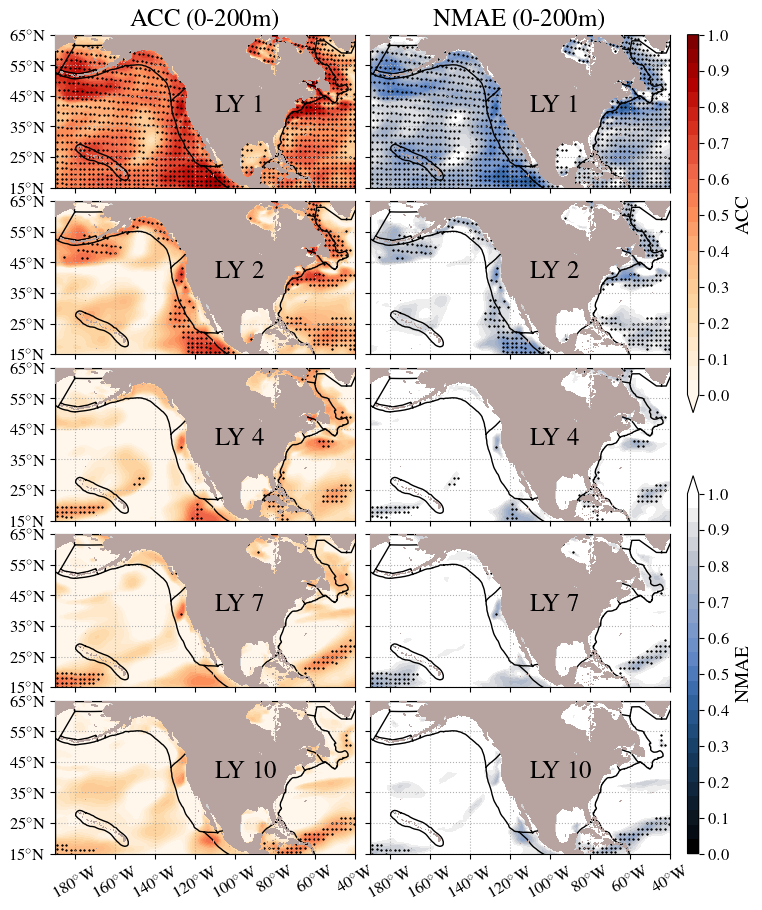

In [10]:
fig = plt.figure(figsize=[7.5, 9])
lyy = np.array([0, 1, 3, 6, 9])
for gg, ldd in zip(range(5), lyy):
    for vv, mm, tit in [[corr_p, 0, f'  ACC ({layer})'], [nmae_p, 1, f'  NMAE ({layer})']]:
    ## persistence lead year 1,2,4,7,10
    ## DPLE lead year 1,2,4,7,10
    ## DPLE - persistence difference
            ax = fig.add_axes([0.065+mm*0.42, 0.05+(4-gg)*0.185, 0.4, 0.17])
            #
            xrr = np.arange(lon_min-10, lon_max+10)
            ax.fill_between(xrr, np.ones(len(xrr))*(lat_min-10), np.ones(len(xrr))*(lat_max+10), color='lightgray')
            for pp in range(len(lon0)):
                ax.plot(lon0[pp], lat0[pp], color='k', linewidth=1., zorder=19)
            if mm == 0:
                cd1 = ax.contourf(lon, lat, vv[ldd], vct, shading='nearest', cmap=cm.OrRd, norm=pal_normt, extend='min')
            else:
                cd2 = ax.contourf(lon, lat, vv[ldd], vcs, shading='nearest', cmap=cmc.oslo, norm=pal_norms, extend='max')
            print(vv[ldd].min(), vv[ldd].max())
            # plot dots where DPLE ACC is significant at 95% confidence level
            lon1 = np.ma.array(lon, mask=~pmask[ldd])
            lat1 = np.ma.array(lat, mask=~pmask[ldd])
            ax.scatter(lon1[::4, ::2], lat1[::4, ::2], s=5, marker='.', color='k', alpha=1, linewidth=.5)
            # plot continent/bathymetry
            ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4,zorder=20)
            ax.text(-110, 40, 'LY %d' % (ldd+1), fontsize=18, fontweight='bold', zorder=21)
            ax.set_xlim(lon_min, lon_max)
            ax.set_ylim(lat_min, lat_max)
            ax.set_xticks(np.arange(-180, -30, 20))
            ax.set_yticks(np.arange(15, 66, 10))
            if gg == 0:
                ax.set_title(tit, fontsize=18, fontweight='bold')
            #
            xtl = []
            for ii in np.arange(-180, -30, 20):
                if ii < -180:
                    ii = ii + 360
                    ff = 'E'
                elif ii >= -180:
                    ff = 'W'
                elif np.abs(ii-0) < 1e-5:
                    ff = ''
                xtl.append('%d$^\circ$%s' % (abs(ii), ff))
            ytl = []
            for jj in np.arange(15, 66, 10):
                if jj < 0:
                    ff = 'S'
                elif jj > 0:
                    ff = 'N'
                elif np.abs(jj-0) < 1e-5:
                    ff = ''
                ytl.append('%d$^\circ$%s' % (abs(jj), ff))
            if gg == 4:
                ax.set_xticklabels(xtl, fontsize=12, fontweight='bold', rotation=30)
            else:
                ax.set_xticklabels([], fontsize=12, fontweight='bold', rotation=30)
            if mm == 0:
                ax.set_yticklabels(ytl, fontsize=12, fontweight='bold')
            else:
                ax.set_yticklabels([], fontsize=12, fontweight='bold')
            ax.plot([lon_min, lon_max], [lat_max, lat_max], color='k', linewidth=1, zorder=10)
            ax.plot([lon_min, lon_min], [lat_min, lat_max], color='k', linewidth=1, zorder=10)
            ax.grid(linestyle='dotted', zorder=11)
        # colorbar
            if gg == 0 and mm == 0:
                cbaxes = fig.add_axes([0.908, 0.54, 0.015, 0.42])
                cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
                cb.ax.tick_params(labelsize=12)
                cb.set_label(label='ACC', fontsize=14, fontweight='bold')
            elif gg == 0 and mm == 1:
                cbaxes = fig.add_axes([0.908, 0.05, 0.015, 0.42])
                cb = plt.colorbar(cd2, orientation="vertical", cax=cbaxes, extend='max', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
                cb.ax.tick_params(labelsize=12)
                cb.set_label(label='NMAE', fontsize=14, fontweight='bold')
# save to file
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/{ffgg}_Pers_ACC_NMAE_spatial_{var}_medium_Eo_{layer}.png'
plt.savefig(outfile, dpi=400)
plt.show()

-0.5261940644691608 0.9985657064240704
0.04103737400590728 2.209234905399233
-0.3878923480316555 0.9905783973748834
0.12048174480762483 1.712160243250478
-0.5378093698133726 0.9616093065989165
0.22980186098103647 1.484097432794007
-0.6793237508585451 0.9445334970605852
0.3784227431578125 1.7785578215439446
-0.7335241542585601 0.9082437730775174
0.4138341649785737 1.851940509432186


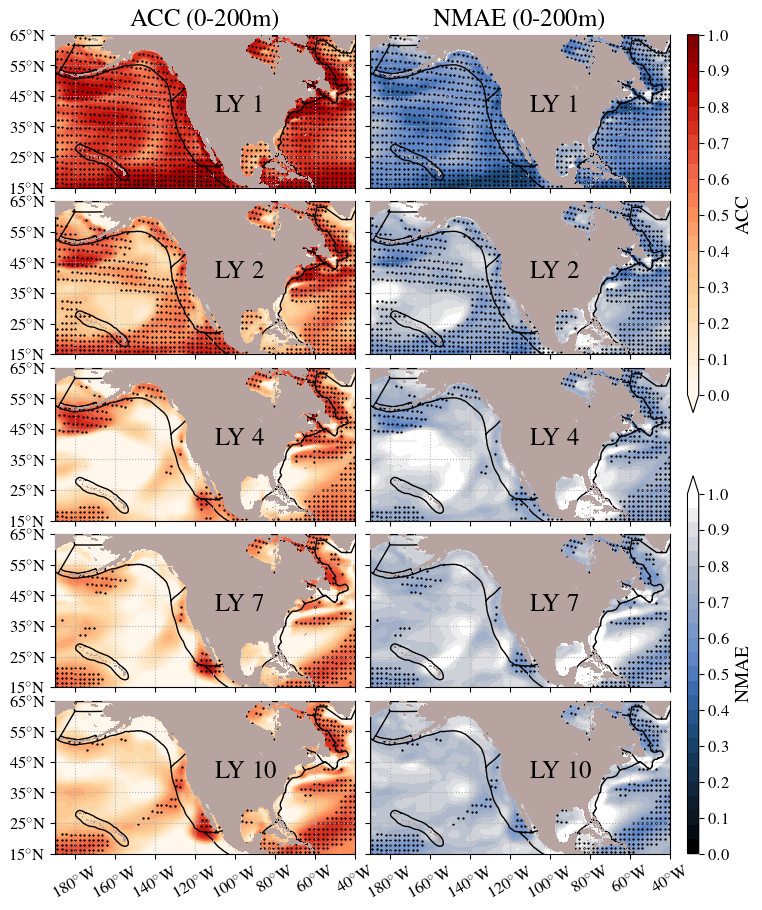

In [11]:
fig = plt.figure(figsize=[7.5, 9])
lyy = np.array([0, 1, 3, 6, 9])
for gg, ldd in zip(range(5), lyy):
    for vv, mm, tit in [[corr_d, 0, f'  ACC ({layer})'], [nmae_d, 1, f'  NMAE ({layer})']]:
    ## persistence lead year 1,2,4,7,10
    ## DPLE lead year 1,2,4,7,10
    ## DPLE - persistence difference
            ax = fig.add_axes([0.065+mm*0.42, 0.05+(4-gg)*0.185, 0.4, 0.17])
            #
            xrr = np.arange(lon_min-10, lon_max+10)
            ax.fill_between(xrr, np.ones(len(xrr))*(lat_min-10), np.ones(len(xrr))*(lat_max+10), color='lightgray')
            for pp in range(len(lon0)):
                ax.plot(lon0[pp], lat0[pp], color='k', linewidth=1., zorder=19)
            if mm == 0:
                cd1 = ax.contourf(lon, lat, vv[ldd], vct, shading='nearest', cmap=cm.OrRd, norm=pal_normt, extend='min')
            else:
                cd2 = ax.contourf(lon, lat, vv[ldd], vcs, shading='nearest', cmap=cmc.oslo, norm=pal_norms, extend='max')
            print(vv[ldd].min(), vv[ldd].max())
            # plot dots where DPLE ACC is significant at 95% confidence level
            lon1 = np.ma.array(lon, mask=~maskk[ldd])
            lat1 = np.ma.array(lat, mask=~maskk[ldd])
            ax.scatter(lon1[::4, ::2], lat1[::4, ::2], s=5, marker='.', color='k', alpha=1, linewidth=.5)
            # plot continent/bathymetry
            ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4,zorder=20)
            ax.text(-110, 40, 'LY %d' % (ldd+1), fontsize=18, fontweight='bold', zorder=21)
            ax.set_xlim(lon_min, lon_max)
            ax.set_ylim(lat_min, lat_max)
            ax.set_xticks(np.arange(-180, -30, 20))
            ax.set_yticks(np.arange(15, 66, 10))
            if gg == 0:
                ax.set_title(tit, fontsize=18, fontweight='bold')
            #
            xtl = []
            for ii in np.arange(-180, -30, 20):
                if ii < -180:
                    ii = ii + 360
                    ff = 'E'
                elif ii >= -180:
                    ff = 'W'
                elif np.abs(ii-0) < 1e-5:
                    ff = ''
                xtl.append('%d$^\circ$%s' % (abs(ii), ff))
            ytl = []
            for jj in np.arange(15, 66, 10):
                if jj < 0:
                    ff = 'S'
                elif jj > 0:
                    ff = 'N'
                elif np.abs(jj-0) < 1e-5:
                    ff = ''
                ytl.append('%d$^\circ$%s' % (abs(jj), ff))
            if gg == 4:
                ax.set_xticklabels(xtl, fontsize=12, fontweight='bold', rotation=30)
            else:
                ax.set_xticklabels([], fontsize=12, fontweight='bold', rotation=30)
            if mm == 0:
                ax.set_yticklabels(ytl, fontsize=12, fontweight='bold')
            else:
                ax.set_yticklabels([], fontsize=12, fontweight='bold')
            ax.plot([lon_min, lon_max], [lat_max, lat_max], color='k', linewidth=1, zorder=10)
            ax.plot([lon_min, lon_min], [lat_min, lat_max], color='k', linewidth=1, zorder=10)
            ax.grid(linestyle='dotted', zorder=11)
        # colorbar
            if gg == 0 and mm == 0:
                cbaxes = fig.add_axes([0.908, 0.54, 0.015, 0.42])
                cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
                cb.ax.tick_params(labelsize=12)
                cb.set_label(label='ACC', fontsize=14, fontweight='bold')
            elif gg == 0 and mm == 1:
                cbaxes = fig.add_axes([0.908, 0.05, 0.015, 0.42])
                cb = plt.colorbar(cd2, orientation="vertical", cax=cbaxes, extend='max', ticks=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
                cb.ax.tick_params(labelsize=12)
                cb.set_label(label='NMAE', fontsize=14, fontweight='bold')
# save to file
output = f'/glade/scratch/{USER}/DPLE-plots'
outfile = f'{output}/{ffgg}_DPLE_ACC_NMAE_spatial_{var}_medium_Eo_{layer}.png'
plt.savefig(outfile, dpi=400)
plt.show()